In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler,MinMaxScaler
pd.set_option('display.max_columns',30)
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
# Loading train data

train = pd.read_csv('train.csv')
train_copy = train.copy()
print("Shape :",train.shape)
train.head()

Shape : (8012, 11)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Airline C,12/06/2019,Delhi,Cochin,DEL → MAA → COK,20:40,09:25 13 Jun,12h 45m,1 stop,No info,7480
1,Airline A,18/06/2019,Banglore,Delhi,BLR → DEL,18:55,22:00,3h 5m,non-stop,No info,8016
2,Airline C,18/05/2019,Delhi,Cochin,DEL → BOM → COK,03:50,19:15,15h 25m,1 stop,No info,8879
3,Airline A,6/05/2019,Kolkata,Banglore,CCU → BOM → BLR,20:00,08:15 07 May,12h 15m,1 stop,In-flight meal not included,9663
4,Airline A,9/05/2019,Kolkata,Banglore,CCU → BOM → BLR,06:30,12:00,5h 30m,1 stop,In-flight meal not included,9663


In [3]:
# Info

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8012 entries, 0 to 8011
Data columns (total 11 columns):
Airline            8012 non-null object
Date_of_Journey    8012 non-null object
Source             8012 non-null object
Destination        8012 non-null object
Route              8011 non-null object
Dep_Time           8012 non-null object
Arrival_Time       8012 non-null object
Duration           8012 non-null object
Total_Stops        8011 non-null object
Additional_Info    8012 non-null object
Price              8012 non-null int64
dtypes: int64(1), object(10)
memory usage: 688.7+ KB


# Variable Identification

In [4]:
# Categorical Columns

def cat_cols(data):
    return data.select_dtypes(include='object').columns.tolist()

cat_cols(train)

['Airline',
 'Date_of_Journey',
 'Source',
 'Destination',
 'Route',
 'Dep_Time',
 'Arrival_Time',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [5]:
# Numerical Columns

def num_cols(data):
    return data.select_dtypes(include='number').columns.tolist()

num_cols(train)

['Price']

# Univariate Analysis

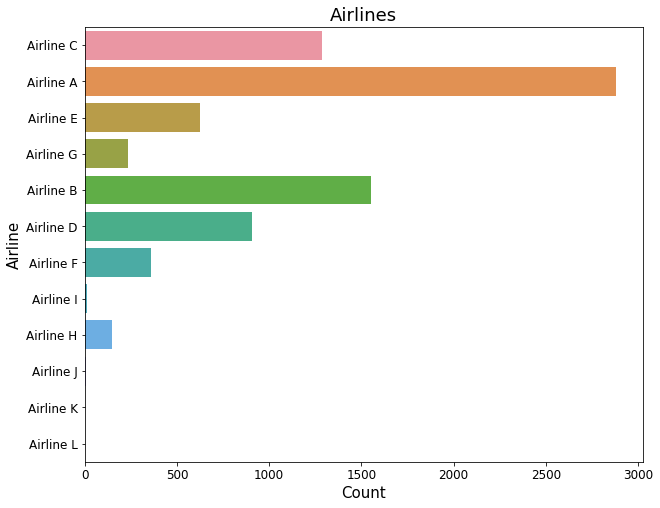

In [6]:
# Airline

plt.figure(figsize=[10,8])
sns.countplot(y=train.Airline)
plt.title("Airlines",fontsize=18)
plt.xlabel("Count",fontsize=15)
plt.ylabel("Airline",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

In [7]:
# Date of journey

train['Date_of_Journey'] = pd.to_datetime(train['Date_of_Journey'])
print("Number of Unique dates in Date of Journey :",train.Date_of_Journey.nunique())
print("Earliest Date :",train.Date_of_Journey.min())
print("Latest Date :",train.Date_of_Journey.max())

Number of Unique dates in Date of Journey : 40
Earliest Date : 2019-01-03 00:00:00
Latest Date : 2019-12-06 00:00:00


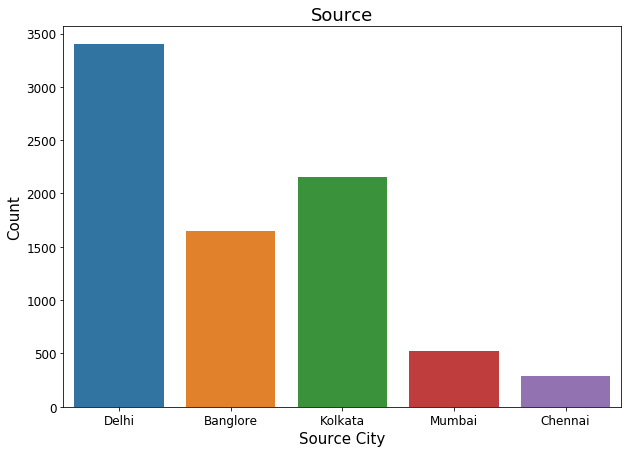

In [8]:
# Source

plt.figure(figsize=[10,7])
sns.countplot(train.Source)
plt.title("Source",fontsize=18)
plt.xlabel("Source City",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

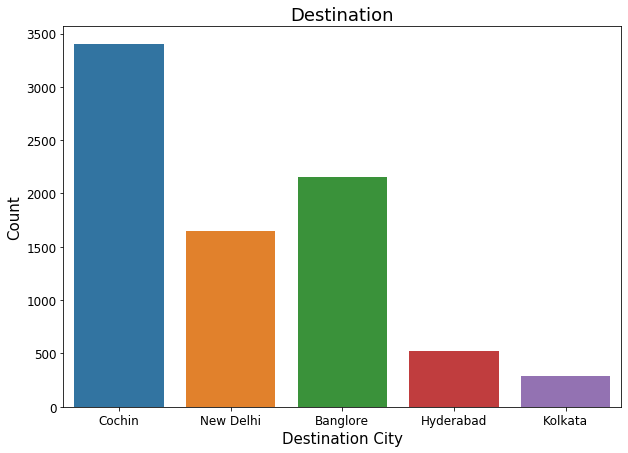

In [10]:
# Destination

plt.figure(figsize=[10,7])
sns.countplot(train.Destination)
plt.title("Destination",fontsize=18)
plt.xlabel("Destination City",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

In [11]:
# Source/Destination

print("Source :",train.Source.unique())
print("\nDestination :",train.Destination.unique())

Source : ['Delhi' 'Banglore' 'Kolkata' 'Mumbai' 'Chennai']

Destination : ['Cochin' 'New Delhi' 'Banglore' 'Hyderabad' 'Kolkata']


In [12]:
# Route

print("Number of unique routes :",train.Route.nunique())

Number of unique routes : 122


In [13]:
# Departure Time converted into minutes

train['Dep_Time'] = (train.Dep_Time.astype('datetime64[ns]').apply(lambda x:x.hour)*60 +
 train.Dep_Time.astype('datetime64[ns]').apply(lambda x:x.minute))

train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Airline C,2019-12-06,Delhi,Cochin,DEL → MAA → COK,1240,09:25 13 Jun,12h 45m,1 stop,No info,7480
1,Airline A,2019-06-18,Banglore,New Delhi,BLR → DEL,1135,22:00,3h 5m,non-stop,No info,8016
2,Airline C,2019-05-18,Delhi,Cochin,DEL → BOM → COK,230,19:15,15h 25m,1 stop,No info,8879
3,Airline A,2019-06-05,Kolkata,Banglore,CCU → BOM → BLR,1200,08:15 07 May,12h 15m,1 stop,In-flight meal not included,9663
4,Airline A,2019-09-05,Kolkata,Banglore,CCU → BOM → BLR,390,12:00,5h 30m,1 stop,In-flight meal not included,9663


In [14]:
# Arrival Time

train["Arrival_Time"] = (pd.to_datetime(train.Arrival_Time).apply(lambda x :x.hour)*60 +
 pd.to_datetime(train.Arrival_Time).apply(lambda x :x.minute))

train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Airline C,2019-12-06,Delhi,Cochin,DEL → MAA → COK,1240,565,12h 45m,1 stop,No info,7480
1,Airline A,2019-06-18,Banglore,New Delhi,BLR → DEL,1135,1320,3h 5m,non-stop,No info,8016
2,Airline C,2019-05-18,Delhi,Cochin,DEL → BOM → COK,230,1155,15h 25m,1 stop,No info,8879
3,Airline A,2019-06-05,Kolkata,Banglore,CCU → BOM → BLR,1200,495,12h 15m,1 stop,In-flight meal not included,9663
4,Airline A,2019-09-05,Kolkata,Banglore,CCU → BOM → BLR,390,720,5h 30m,1 stop,In-flight meal not included,9663


In [15]:
# Duration mistake row

print(train[train['Duration']=='5m'])
print(train.iloc[1054,:])

        Airline Date_of_Journey  Source Destination                  Route  \
1054  Airline C      2019-06-03  Mumbai   Hyderabad  BOM → GOI → PNQ → HYD   

      Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
1054      1010          1015       5m     2 stops         No info  17327  
Airline                        Airline C
Date_of_Journey      2019-06-03 00:00:00
Source                            Mumbai
Destination                    Hyderabad
Route              BOM → GOI → PNQ → HYD
Dep_Time                            1010
Arrival_Time                        1015
Duration                              5m
Total_Stops                      2 stops
Additional_Info                  No info
Price                              17327
Name: 1054, dtype: object


In [16]:
# Duration

train.drop(index=1054,inplace=True) ## This row has a mistake (shows duration of flight = 5mins)
train['Duration_Hours'] = train['Duration'].str.split().str[0].str.replace('h','')
train['Duration_Minutes'] = train['Duration'].str.split().str[1].str.replace('m','')
train['Duration_in_minutes'] = train.Duration_Hours.astype('int')*60 + train.Duration_Minutes.fillna(0).astype('int')
train.drop(columns=['Duration','Duration_Hours','Duration_Minutes'],inplace=True)
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Duration_in_minutes
0,Airline C,2019-12-06,Delhi,Cochin,DEL → MAA → COK,1240,565,1 stop,No info,7480,765
1,Airline A,2019-06-18,Banglore,New Delhi,BLR → DEL,1135,1320,non-stop,No info,8016,185
2,Airline C,2019-05-18,Delhi,Cochin,DEL → BOM → COK,230,1155,1 stop,No info,8879,925
3,Airline A,2019-06-05,Kolkata,Banglore,CCU → BOM → BLR,1200,495,1 stop,In-flight meal not included,9663,735
4,Airline A,2019-09-05,Kolkata,Banglore,CCU → BOM → BLR,390,720,1 stop,In-flight meal not included,9663,330


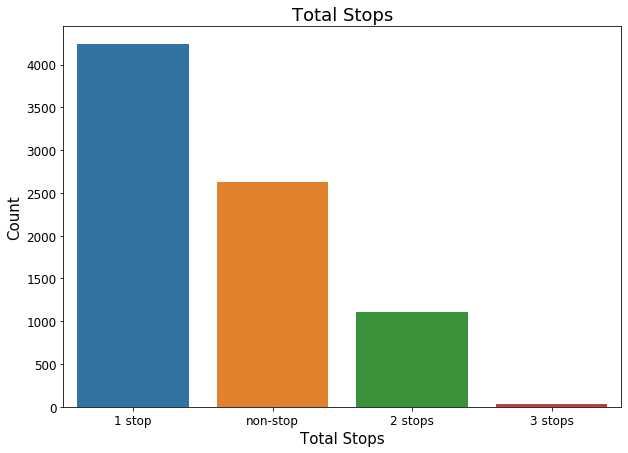

In [17]:
# Total Stops

plt.figure(figsize=[10,7])
sns.countplot(train.Total_Stops)
plt.title("Total Stops",fontsize=18)
plt.xlabel("Total Stops",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

In [18]:
# Additional Info

print("Value Counts of Additional Info\n\n",train.Additional_Info.value_counts())
train.Additional_Info.replace({"No Info":"No info"},inplace=True)
print("Value Counts of Additional Info after treating error\n\n",train.Additional_Info.value_counts())

Value Counts of Additional Info

 No info                         6250
In-flight meal not included     1492
No check-in baggage included     249
1 Long layover                     9
Business class                     3
No Info                            3
Change airports                    2
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64
Value Counts of Additional Info after treating error

 No info                         6253
In-flight meal not included     1492
No check-in baggage included     249
1 Long layover                     9
Business class                     3
Change airports                    2
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64


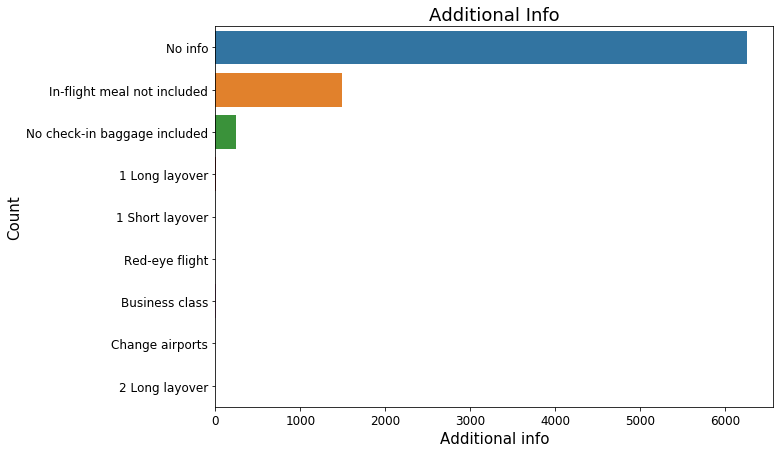

In [19]:
# Additional Info

plt.figure(figsize=[10,7])
sns.countplot(y=train.Additional_Info)
plt.title("Additional Info",fontsize=18)
plt.xlabel("Additional info",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

# Bivariate Analysis

In [20]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Duration_in_minutes
0,Airline C,2019-12-06,Delhi,Cochin,DEL → MAA → COK,1240,565,1 stop,No info,7480,765
1,Airline A,2019-06-18,Banglore,New Delhi,BLR → DEL,1135,1320,non-stop,No info,8016,185
2,Airline C,2019-05-18,Delhi,Cochin,DEL → BOM → COK,230,1155,1 stop,No info,8879,925
3,Airline A,2019-06-05,Kolkata,Banglore,CCU → BOM → BLR,1200,495,1 stop,In-flight meal not included,9663,735
4,Airline A,2019-09-05,Kolkata,Banglore,CCU → BOM → BLR,390,720,1 stop,In-flight meal not included,9663,330


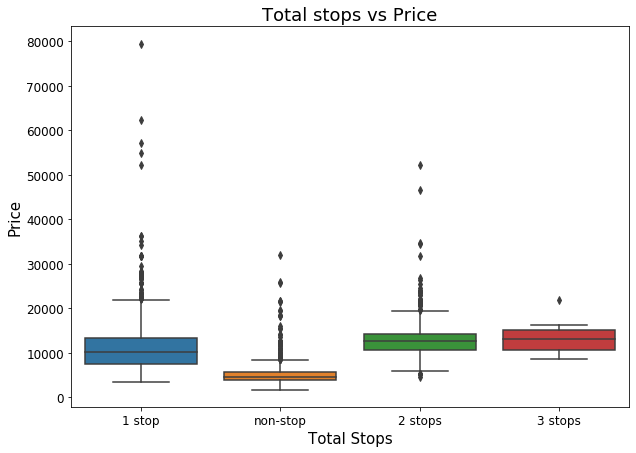

In [21]:
# Boxplot for Total stops vs Price

plt.figure(figsize=[10,7])
sns.boxplot(train['Total_Stops'],train['Price'])
plt.title("Total stops vs Price",fontsize=18)
plt.xlabel('Total Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

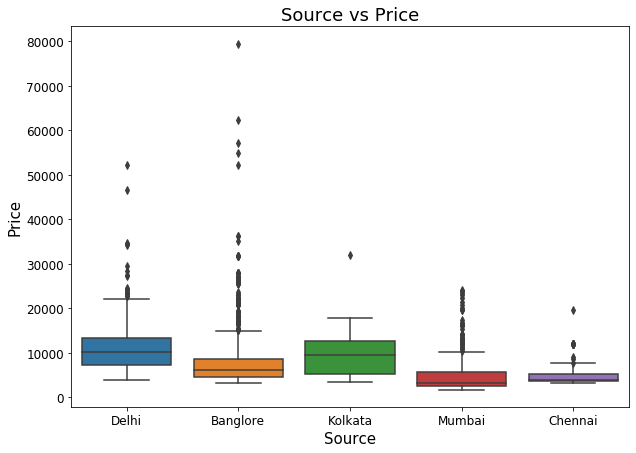

In [22]:
# Boxplot for Source vs Price

plt.figure(figsize=[10,7])
sns.boxplot(train['Source'],train['Price'])
plt.title("Source vs Price",fontsize=18)
plt.xlabel('Source',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

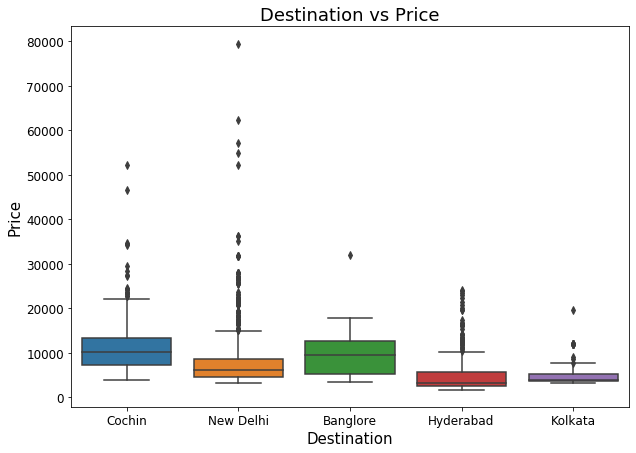

In [23]:
# Boxplot for Destination vs Price

plt.figure(figsize=[10,7])
sns.boxplot(train['Destination'],train['Price'])
plt.title("Destination vs Price",fontsize=18)
plt.xlabel('Destination',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

# Missing Values

In [24]:
# Missing values

def missing_values(dataframe):
    counts = dataframe.isnull().sum()
    percent = dataframe.isnull().sum()/dataframe.shape[0]*100
    return pd.DataFrame({"Count":counts,"Percntage":percent},index=dataframe.isnull().sum().index)

missing_values(train)

,Count,Percntage
Airline,0,0.000000
Date_of_Journey,0,0.000000
Source,0,0.000000
Destination,0,0.000000
Route,1,0.012483
Dep_Time,0,0.000000
Arrival_Time,0,0.000000
Total_Stops,1,0.012483
Additional_Info,0,0.000000
Price,0,0.000000


In [25]:
# Deleting row with missing values

train = train.dropna()
missing_values(train)

,Count,Percntage
Airline,0,0.0
Date_of_Journey,0,0.0
Source,0,0.0
Destination,0,0.0
Route,0,0.0
Dep_Time,0,0.0
Arrival_Time,0,0.0
Total_Stops,0,0.0
Additional_Info,0,0.0
Price,0,0.0


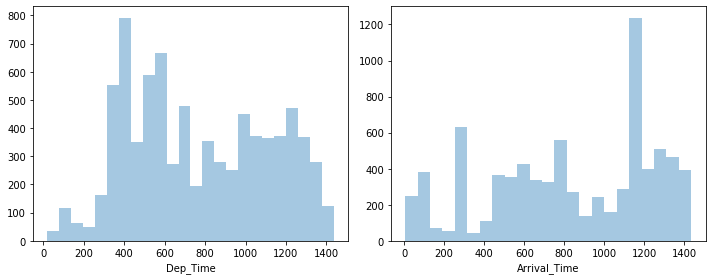

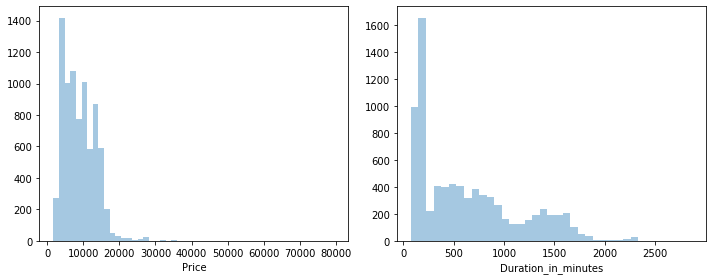

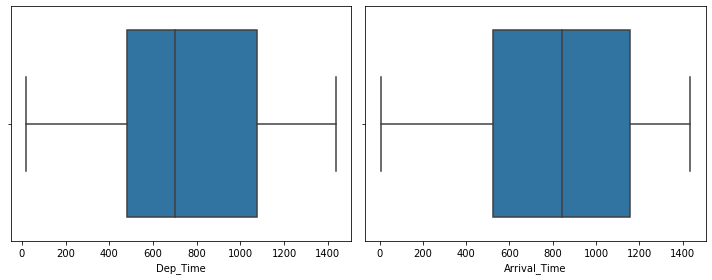

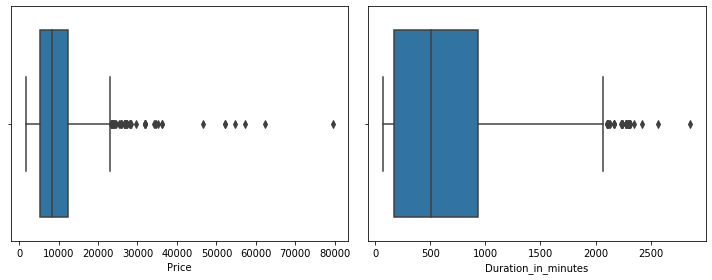

In [26]:
# Function to plot histograms

def plot_continuous_columns(dataframe):
    numeric_columns = dataframe.select_dtypes(include=['number']).columns.tolist()
    dataframe = dataframe[numeric_columns]
    
    for i in range(0,len(numeric_columns),2):
        if len(numeric_columns) > i+1:
            plt.figure(figsize=(10,4))
            plt.subplot(121)
            sns.distplot(dataframe[numeric_columns[i]], kde=False)
            plt.subplot(122)            
            sns.distplot(dataframe[numeric_columns[i+1]], kde=False)
            plt.tight_layout()
            plt.show()

        else:
            sns.distplot(dataframe[numeric_columns[i]], kde=False)

# Function to plot boxplots
def plot_box_plots(dataframe):
    numeric_columns = dataframe.select_dtypes(include=['number']).columns.tolist()
    dataframe = dataframe[numeric_columns]
    
    for i in range(0,len(numeric_columns),2):
        if len(numeric_columns) > i+1:
            plt.figure(figsize=(10,4))
            plt.subplot(121)            
            sns.boxplot(dataframe[numeric_columns[i]])
            plt.subplot(122)            
            sns.boxplot(dataframe[numeric_columns[i+1]])
            plt.tight_layout()
            plt.show()

        else:
            sns.boxplot(dataframe[numeric_columns[i]])

plot_continuous_columns(train)            
plot_box_plots(train)


# Outlier Detection

In [27]:
# Function to detect outliers in every feature

def detect_outliers(dataframe):
    cols = list(dataframe)
    outliers = pd.DataFrame(columns=['Feature','Number of Outliers'])
    
    for column in cols:
        if column in dataframe.select_dtypes(include=np.number).columns:
            # first quartile (Q1)
            q1 = dataframe[column].quantile(0.25) 
            
            # third quartile (Q3)
            q3 = dataframe[column].quantile(0.75)
            
            # IQR
            iqr = q3 - q1
            
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            outliers = outliers.append({'Feature':column,'Number of Outliers':dataframe.loc[(dataframe[column] < fence_low) | (dataframe[column] > fence_high)].shape[0]},ignore_index=True)
    return outliers

detect_outliers(train)


,Feature,Number of Outliers
0,Dep_Time,0
1,Arrival_Time,0
2,Price,72
3,Duration_in_minutes,55


# Variable Transformation and Creation

In [28]:
# Creating different columns for day and month of date of journey

train["Day_of_Journey"] = train['Date_of_Journey'].apply(lambda x:x.day)
train["Month_of_Journey"] = train['Date_of_Journey'].apply(lambda x:x.month)
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Duration_in_minutes,Day_of_Journey,Month_of_Journey
0,Airline C,2019-12-06,Delhi,Cochin,DEL → MAA → COK,1240,565,1 stop,No info,7480,765,6,12
1,Airline A,2019-06-18,Banglore,New Delhi,BLR → DEL,1135,1320,non-stop,No info,8016,185,18,6
2,Airline C,2019-05-18,Delhi,Cochin,DEL → BOM → COK,230,1155,1 stop,No info,8879,925,18,5
3,Airline A,2019-06-05,Kolkata,Banglore,CCU → BOM → BLR,1200,495,1 stop,In-flight meal not included,9663,735,5,6
4,Airline A,2019-09-05,Kolkata,Banglore,CCU → BOM → BLR,390,720,1 stop,In-flight meal not included,9663,330,5,9


In [29]:
# Creating a column that tells whether the destination was reached the same day or the next day

print("Time 11:59PM in minutes :",23*60 + 59)
train['Arrived_Next_Day'] = np.where((train.Dep_Time + train.Duration_in_minutes) > 1439,1,0)
train.head()

Time 11:59PM in minutes : 1439


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Duration_in_minutes,Day_of_Journey,Month_of_Journey,Arrived_Next_Day
0,Airline C,2019-12-06,Delhi,Cochin,DEL → MAA → COK,1240,565,1 stop,No info,7480,765,6,12,1
1,Airline A,2019-06-18,Banglore,New Delhi,BLR → DEL,1135,1320,non-stop,No info,8016,185,18,6,0
2,Airline C,2019-05-18,Delhi,Cochin,DEL → BOM → COK,230,1155,1 stop,No info,8879,925,18,5,0
3,Airline A,2019-06-05,Kolkata,Banglore,CCU → BOM → BLR,1200,495,1 stop,In-flight meal not included,9663,735,5,6,1
4,Airline A,2019-09-05,Kolkata,Banglore,CCU → BOM → BLR,390,720,1 stop,In-flight meal not included,9663,330,5,9,0


In [30]:
# Removing unwanted columns

train = train.drop(columns=['Date_of_Journey','Route','Additional_Info'])
train.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Price,Duration_in_minutes,Day_of_Journey,Month_of_Journey,Arrived_Next_Day
0,Airline C,Delhi,Cochin,1240,565,1 stop,7480,765,6,12,1
1,Airline A,Banglore,New Delhi,1135,1320,non-stop,8016,185,18,6,0
2,Airline C,Delhi,Cochin,230,1155,1 stop,8879,925,18,5,0
3,Airline A,Kolkata,Banglore,1200,495,1 stop,9663,735,5,6,1
4,Airline A,Kolkata,Banglore,390,720,1 stop,9663,330,5,9,0


# Data Preprocessing

In [31]:
# Replacing total stops with numerical values

total_stops_dict = {'1 stop':1,'non-stop':0,'2 stops':2,'3 stops':3}
train['Total_Stops'] = train['Total_Stops'].map(total_stops_dict)
train.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Price,Duration_in_minutes,Day_of_Journey,Month_of_Journey,Arrived_Next_Day
0,Airline C,Delhi,Cochin,1240,565,1,7480,765,6,12,1
1,Airline A,Banglore,New Delhi,1135,1320,0,8016,185,18,6,0
2,Airline C,Delhi,Cochin,230,1155,1,8879,925,18,5,0
3,Airline A,Kolkata,Banglore,1200,495,1,9663,735,5,6,1
4,Airline A,Kolkata,Banglore,390,720,1,9663,330,5,9,0


In [32]:
# Encoding train data with dummies

train = pd.get_dummies(train,drop_first=False)
train.head()

,Dep_Time,Arrival_Time,Total_Stops,Price,Duration_in_minutes,Day_of_Journey,Month_of_Journey,Arrived_Next_Day,Airline_Airline A,Airline_Airline B,Airline_Airline C,Airline_Airline D,Airline_Airline E,Airline_Airline F,Airline_Airline G,Airline_Airline H,Airline_Airline I,Airline_Airline J,Airline_Airline K,Airline_Airline L,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1240,565,1,7480,765,6,12,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,1135,1320,0,8016,185,18,6,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,230,1155,1,8879,925,18,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,1200,495,1,9663,735,5,6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
4,390,720,1,9663,330,5,9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


# Correlation 

In [33]:
# Correlation

train.corr()

,Dep_Time,Arrival_Time,Total_Stops,Price,Duration_in_minutes,Day_of_Journey,Month_of_Journey,Arrived_Next_Day,Airline_Airline A,Airline_Airline B,Airline_Airline C,Airline_Airline D,Airline_Airline E,Airline_Airline F,Airline_Airline G,Airline_Airline H,Airline_Airline I,Airline_Airline J,Airline_Airline K,Airline_Airline L,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
Dep_Time,1.000000,0.012968,-0.052658,0.010217,0.004936,-0.005286,0.022134,0.471533,0.115128,-0.018364,-0.010520,-0.157587,-0.008713,0.013961,0.050886,-0.014051,-0.030686,-0.007933,-0.004484,0.000442,-0.005495,-0.010823,-0.122569,0.155454,-0.016579,0.155454,-0.122569,-0.016579,-0.010823,-0.005495
Arrival_Time,0.012968,1.000000,0.034448,0.026124,0.054922,-0.004045,-0.004997,-0.521992,-0.025399,-0.080663,0.091657,0.066817,-0.081527,0.071341,-0.041793,0.023746,0.015535,-0.016476,0.000977,0.004254,-0.021939,-0.020013,-0.014020,0.060931,-0.030285,0.060931,-0.014020,-0.030285,-0.020013,-0.021939
Total_Stops,-0.052658,0.034448,1.000000,0.600584,0.738094,-0.017441,0.064026,0.469831,0.219932,-0.299792,0.268798,0.121540,-0.273562,-0.130782,-0.094089,-0.063289,0.010446,0.020970,-0.023596,0.003013,-0.370913,-0.235847,0.492041,0.036827,-0.265388,0.036827,0.492041,-0.265388,-0.235847,-0.370913
Price,0.010217,0.026124,0.600584,1.000000,0.502361,-0.163890,0.007319,0.340782,0.412873,-0.358113,0.046028,0.141290,-0.294740,-0.064597,-0.131132,-0.092350,0.019846,0.291775,-0.000414,-0.011887,-0.114476,-0.180621,0.263554,0.018215,-0.236376,0.018215,0.263554,-0.236376,-0.180621,-0.114476
Duration_in_minutes,0.004936,0.054922,0.738094,0.502361,1.000000,-0.043498,0.054694,0.666862,0.312775,-0.342549,0.265456,-0.011289,-0.265172,-0.034003,-0.101792,-0.092260,-0.002377,-0.013734,-0.018629,-0.009835,-0.261875,-0.191463,0.287273,0.131580,-0.237750,0.131580,0.287273,-0.237750,-0.191463,-0.261875
Day_of_Journey,-0.005286,-0.004045,-0.017441,-0.163890,-0.043498,1.000000,-0.275472,-0.034987,-0.035965,0.019744,-0.031878,0.052954,0.021697,-0.017968,0.008029,0.006566,0.036719,-0.030195,-0.020612,-0.012323,-0.067093,0.013618,0.114055,-0.069693,-0.003564,-0.069693,0.114055,-0.003564,0.013618,-0.067093
Month_of_Journey,0.022134,-0.004997,0.064026,0.007319,0.054694,-0.275472,1.000000,0.053666,0.058150,-0.040061,-0.003473,-0.007943,-0.025440,0.005747,0.008777,-0.013041,-0.033174,-0.031058,-0.014425,0.001611,-0.064643,-0.010961,0.008275,0.063606,-0.016598,0.063606,0.008275,-0.016598,-0.010961,-0.064643
Arrived_Next_Day,0.471533,-0.521992,0.469831,0.340782,0.666862,-0.034987,0.053666,1.000000,0.283799,-0.203866,0.136242,-0.120679,-0.144788,-0.057132,-0.022609,-0.085615,-0.025330,-0.003956,-0.015945,-0.009204,-0.174244,-0.129357,0.145049,0.139499,-0.157711,0.139499,0.145049,-0.157711,-0.129357,-0.174244
Airline_Airline A,0.115128,-0.025399,0.219932,0.412873,0.312775,-0.035965,0.058150,0.283799,1.000000,-0.367117,-0.327613,-0.267650,-0.218032,-0.162583,-0.130298,-0.102120,-0.029031,-0.020520,-0.014507,-0.008375,-0.002228,-0.145000,-0.033066,0.115016,-0.027140,0.115016,-0.033066,-0.027140,-0.145000,-0.002228
Airline_Airline B,-0.018364,-0.080663,-0.299792,-0.358113,-0.342549,0.019744,-0.040061,-0.203866,-0.367117,1.000000,-0.214119,-0.174929,-0.142500,-0.106260,-0.085160,-0.066743,-0.018974,-0.013411,-0.009481,-0.005473,0.062288,0.135696,-0.073759,-0.068036,0.065284,-0.068036,-0.073759,0.065284,0.135696,0.062288


In [34]:
# Correlation w.r.t target Price

print("Correlation of all columns to Price\n")
price_corr = train.corr()['Price']
print(price_corr.sort_values(ascending=False))

Correlation of all columns to Price

Price                    1.000000
Total_Stops              0.600584
Duration_in_minutes      0.502361
Airline_Airline A        0.412873
Arrived_Next_Day         0.340782
Airline_Airline J        0.291775
Destination_Cochin       0.263554
Source_Delhi             0.263554
Airline_Airline D        0.141290
Airline_Airline C        0.046028
Arrival_Time             0.026124
Airline_Airline I        0.019846
Destination_Banglore     0.018215
Source_Kolkata           0.018215
Dep_Time                 0.010217
Month_of_Journey         0.007319
Airline_Airline K       -0.000414
Airline_Airline L       -0.011887
Airline_Airline F       -0.064597
Airline_Airline H       -0.092350
Destination_New Delhi   -0.114476
Source_Banglore         -0.114476
Airline_Airline G       -0.131132
Day_of_Journey          -0.163890
Destination_Kolkata     -0.180621
Source_Chennai          -0.180621
Source_Mumbai           -0.236376
Destination_Hyderabad   -0.236376
Airline_Air

In [35]:
# Splitting data into features and target

X = train.drop('Price',axis=1)
y = train.Price

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [36]:
# Scaling data

minmax = MinMaxScaler()
X_train_scaled = minmax.fit_transform(X_train)
X_test_scaled = minmax.transform(X_test)

# Vanilla Models

In [37]:
# Linear Regression

linear = LinearRegression()
linear.fit(X_train_scaled,y_train)
y_pred = linear.predict(X_test_scaled)

np.sqrt(mean_squared_error(y_test,y_pred))

75793344172920.06

In [38]:
# Decision Tree

dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)

np.sqrt(mean_squared_error(y_test,dt_pred))

2764.707875686544

In [39]:
# Random Forest

rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

np.sqrt(mean_squared_error(y_test,rf_pred))

2205.724238329523

# Feature Selection

In [40]:
# Extra Tree Regressor

et = ExtraTreeRegressor()
et.fit(X_train,y_train)
(pd.DataFrame({"Feature":X_train.columns,"Feature Importance":et.feature_importances_})
.set_index('Feature').sort_values('Feature Importance',ascending=False))

,Feature Importance
Feature,
Total_Stops,0.245188
Airline_Airline A,0.185548
Month_of_Journey,0.103333
Day_of_Journey,0.098122
Destination_Cochin,0.077950
Airline_Airline J,0.058948
Arrival_Time,0.053714
Dep_Time,0.042399
Duration_in_minutes,0.036987


In [ ]:
# Parameters for Grid Search

param_grid = {'n_estimators':[10,20,50,100,200],'max_features':['sqrt','auto'],'max_depth':[2,3,4,5,6,7],
             'min_samples_split':[2,5,10],'min_samples_leaf':[1,2,4]}

In [ ]:
# GridSearchCV

rf = RandomForestRegressor()
grid_rf = GridSearchCV(rf,param_grid=param_grid,scoring='neg_mean_squared_error',cv=3,verbose=1)
grid_rf.fit(X_train,y_train)

In [ ]:
grid_rf.best_params_

In [41]:
# Hyperparamter Tuning

n_estimators = [int(x) for x in np.linspace(start=50, stop=1000, num=10)]
# number of features to consider at every split
max_features = ['auto', 'sqrt']
# max number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=10)] + [None]
# min number of samples required to split a node
min_samples_split = [2, 5, 10]
# min number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# method of selecting samples for training each tree
bootstrap = [True, False]

In [42]:
# random grid

random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

rf_optimized = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=0)

rf_optimized.fit(X_train,y_train)
rf_optimized.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=577, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=87, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=577, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=87, bootstrap=True, total=   7.8s
[CV] n_estimators=577, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=87, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.7s remaining:    0.0s


[CV]  n_estimators=577, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=87, bootstrap=True, total=   7.9s
[CV] n_estimators=577, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=87, bootstrap=True 
[CV]  n_estimators=577, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=87, bootstrap=True, total=   7.9s
[CV] n_estimators=366, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True 
[CV]  n_estimators=366, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True, total=   1.4s
[CV] n_estimators=366, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True 
[CV]  n_estimators=366, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True, total=   1.4s
[CV] n_estimators=366, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True 
[CV]  n_estimators=366, mi

[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=87, bootstrap=True, total=   4.7s
[CV] n_estimators=577, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=54, bootstrap=True 
[CV]  n_estimators=577, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=54, bootstrap=True, total=   7.9s
[CV] n_estimators=577, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=54, bootstrap=True 
[CV]  n_estimators=577, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=54, bootstrap=True, total=   7.7s
[CV] n_estimators=577, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=54, bootstrap=True 
[CV]  n_estimators=577, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=54, bootstrap=True, total=   7.7s
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=False 
[CV]  n_estimators=50, min_sample

[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=87, bootstrap=False, total=  18.3s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=87, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=87, bootstrap=False, total=  18.8s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=87, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=87, bootstrap=False, total=  19.4s
[CV] n_estimators=788, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=True 
[CV]  n_estimators=788, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=True, total=   3.6s
[CV] n_estimators=788, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=True 
[CV]  n_estimators=788,

[CV]  n_estimators=577, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=43, bootstrap=True, total=   2.6s
[CV] n_estimators=577, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=43, bootstrap=True 
[CV]  n_estimators=577, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=43, bootstrap=True, total=   2.6s
[CV] n_estimators=894, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=894, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, total=   3.7s
[CV] n_estimators=894, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=894, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, total=   3.7s
[CV] n_estimators=894, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=89

[CV]  n_estimators=894, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True, total=   3.5s
[CV] n_estimators=155, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=87, bootstrap=False 
[CV]  n_estimators=155, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=87, bootstrap=False, total=   1.0s
[CV] n_estimators=155, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=87, bootstrap=False 
[CV]  n_estimators=155, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=87, bootstrap=False, total=   0.9s
[CV] n_estimators=155, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=87, bootstrap=False 
[CV]  n_estimators=155, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=87, bootstrap=False, total=   1.0s
[CV] n_estimators=894, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=894, mi

[CV]  n_estimators=50, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=65, bootstrap=True, total=   0.8s
[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=65, bootstrap=True 
[CV]  n_estimators=50, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=65, bootstrap=True, total=   0.8s
[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=65, bootstrap=True 
[CV]  n_estimators=50, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=65, bootstrap=True, total=   0.8s
[CV] n_estimators=366, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=32, bootstrap=True 
[CV]  n_estimators=366, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=32, bootstrap=True, total=   1.8s
[CV] n_estimators=366, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=32, bootstrap=True 
[CV]  n_estimators=366, min_samples_split

[CV]  n_estimators=366, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=76, bootstrap=False, total=   6.9s
[CV] n_estimators=366, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=76, bootstrap=False 
[CV]  n_estimators=366, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=76, bootstrap=False, total=   7.1s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=32, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=32, bootstrap=False, total=  17.0s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=32, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=32, bootstrap=False, total=  17.3s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=32, bootstrap=False 
[CV]  n_estimators

[CV]  n_estimators=683, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=87, bootstrap=True, total=   9.1s
[CV] n_estimators=472, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=472, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   5.3s
[CV] n_estimators=472, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=472, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   5.4s
[CV] n_estimators=472, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=472, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   5.4s
[CV] n_estimators=577, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=54, bootstrap=False 
[CV]  n_estimato

[CV]  n_estimators=894, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=98, bootstrap=True, total=  11.7s
[CV] n_estimators=894, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=98, bootstrap=True 
[CV]  n_estimators=894, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=98, bootstrap=True, total=  11.8s
[CV] n_estimators=894, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=98, bootstrap=True 
[CV]  n_estimators=894, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=98, bootstrap=True, total=  11.8s
[CV] n_estimators=894, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=65, bootstrap=True 
[CV]  n_estimators=894, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=65, bootstrap=True, total=   6.0s
[CV] n_estimators=894, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=65, bootstrap=True 
[CV]  n_estimators=894, min_samples_

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 25.7min finished


{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 43,
 'bootstrap': False}

In [43]:
# Random Forest with Hyperparameter tuning

rf = RandomForestRegressor(n_estimators=1000,max_features='sqrt',min_samples_leaf=1,min_samples_split=5,
                           max_depth=43,random_state=0,bootstrap=False)
rf.fit(X_train,y_train)
rf_pred1 = rf.predict(X_test)

print("RMSE Random Forest :",np.sqrt(mean_squared_error(y_test,rf_pred1)))

RMSE Random Forest : 2093.9321617671303


# Test Data

In [44]:
# Loading Test data

test = pd.read_csv('test.csv')
print("Shape of test data",test.shape)
test.head()

Shape of test data (2671, 10)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Airline B,27-03-2019,Delhi,Cochin,DEL → HYD → COK,04:55,16:10,11h 15m,1 stop,No info
1,Airline E,27-05-2019,Kolkata,Banglore,CCU → BLR,22:20,28-05-2020 00:40,2h 20m,non-stop,No info
2,Airline C,06-06-2019,Kolkata,Banglore,CCU → IXR → DEL → BLR,05:50,20:25,14h 35m,2 stops,No info
3,Airline A,06-03-2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,No info
4,Airline B,15-06-2019,Delhi,Cochin,DEL → BOM → COK,16:00,16-06-2020 01:30,9h 30m,1 stop,No info


# Preprocessing

In [47]:
# Date of journey

test['Date_of_Journey'] = pd.to_datetime(test['Date_of_Journey'])
print("Number of Unique dates in Date of Journey :",test.Date_of_Journey.nunique())
print("Earliest Date :",test.Date_of_Journey.min())
print("Latest Date :",test.Date_of_Journey.max())

Number of Unique dates in Date of Journey : 40
Earliest Date : 2019-01-03 00:00:00
Latest Date : 2019-12-06 00:00:00


In [51]:
# Departure Time converted into minutes

test['Dep_Time'] = (test.Dep_Time.astype('datetime64[ns]').apply(lambda x:x.hour)*60 +
 test.Dep_Time.astype('datetime64[ns]').apply(lambda x:x.minute))

test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Airline B,2019-03-27,Delhi,Cochin,DEL → HYD → COK,0,970,11h 15m,1 stop,No info
1,Airline E,2019-05-27,Kolkata,Banglore,CCU → BLR,0,40,2h 20m,non-stop,No info
2,Airline C,2019-06-06,Kolkata,Banglore,CCU → IXR → DEL → BLR,0,1225,14h 35m,2 stops,No info
3,Airline A,2019-06-03,Banglore,New Delhi,BLR → MAA → DEL,0,865,4h 40m,1 stop,No info
4,Airline B,2019-06-15,Delhi,Cochin,DEL → BOM → COK,0,90,9h 30m,1 stop,No info


In [52]:
# Arrival Time

test["Arrival_Time"] = (pd.to_datetime(test.Arrival_Time).apply(lambda x :x.hour)*60 +
 pd.to_datetime(test.Arrival_Time).apply(lambda x :x.minute))

test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Airline B,2019-03-27,Delhi,Cochin,DEL → HYD → COK,0,0,11h 15m,1 stop,No info
1,Airline E,2019-05-27,Kolkata,Banglore,CCU → BLR,0,0,2h 20m,non-stop,No info
2,Airline C,2019-06-06,Kolkata,Banglore,CCU → IXR → DEL → BLR,0,0,14h 35m,2 stops,No info
3,Airline A,2019-06-03,Banglore,New Delhi,BLR → MAA → DEL,0,0,4h 40m,1 stop,No info
4,Airline B,2019-06-15,Delhi,Cochin,DEL → BOM → COK,0,0,9h 30m,1 stop,No info


In [53]:
# Cleaning Duration column

test['Duration_Hours'] = test['Duration'].str.split().str[0].str.replace('h','')
test['Duration_Minutes'] = test['Duration'].str.split().str[1].str.replace('m','')
test['Duration_in_minutes'] = test.Duration_Hours.astype('int')*60 + test.Duration_Minutes.fillna(0).astype('int')
test.drop(columns=['Duration','Duration_Hours','Duration_Minutes'],inplace=True)
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Duration_in_minutes
0,Airline B,2019-03-27,Delhi,Cochin,DEL → HYD → COK,0,0,1 stop,No info,675
1,Airline E,2019-05-27,Kolkata,Banglore,CCU → BLR,0,0,non-stop,No info,140
2,Airline C,2019-06-06,Kolkata,Banglore,CCU → IXR → DEL → BLR,0,0,2 stops,No info,875
3,Airline A,2019-06-03,Banglore,New Delhi,BLR → MAA → DEL,0,0,1 stop,No info,280
4,Airline B,2019-06-15,Delhi,Cochin,DEL → BOM → COK,0,0,1 stop,No info,570


In [54]:
# Creating different columns for day and month of date of journey

test["Day_of_Journey"] = test['Date_of_Journey'].apply(lambda x:x.day)
test["Month_of_Journey"] = test['Date_of_Journey'].apply(lambda x:x.month)
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Duration_in_minutes,Day_of_Journey,Month_of_Journey
0,Airline B,2019-03-27,Delhi,Cochin,DEL → HYD → COK,0,0,1 stop,No info,675,27,3
1,Airline E,2019-05-27,Kolkata,Banglore,CCU → BLR,0,0,non-stop,No info,140,27,5
2,Airline C,2019-06-06,Kolkata,Banglore,CCU → IXR → DEL → BLR,0,0,2 stops,No info,875,6,6
3,Airline A,2019-06-03,Banglore,New Delhi,BLR → MAA → DEL,0,0,1 stop,No info,280,3,6
4,Airline B,2019-06-15,Delhi,Cochin,DEL → BOM → COK,0,0,1 stop,No info,570,15,6


In [55]:
# Creating a column that tells whether the destination was reached the same day or the next day

print("Time 11:59PM in minutes :",23*60 + 59)
test['Arrived_Next_Day'] = np.where((test.Dep_Time + test.Duration_in_minutes) > 1439,1,0)
test.head()

Time 11:59PM in minutes : 1439


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Duration_in_minutes,Day_of_Journey,Month_of_Journey,Arrived_Next_Day
0,Airline B,2019-03-27,Delhi,Cochin,DEL → HYD → COK,0,0,1 stop,No info,675,27,3,0
1,Airline E,2019-05-27,Kolkata,Banglore,CCU → BLR,0,0,non-stop,No info,140,27,5,0
2,Airline C,2019-06-06,Kolkata,Banglore,CCU → IXR → DEL → BLR,0,0,2 stops,No info,875,6,6,0
3,Airline A,2019-06-03,Banglore,New Delhi,BLR → MAA → DEL,0,0,1 stop,No info,280,3,6,0
4,Airline B,2019-06-15,Delhi,Cochin,DEL → BOM → COK,0,0,1 stop,No info,570,15,6,0


In [56]:
# Removing unwanted columns

test = test.drop(columns=['Date_of_Journey','Route','Additional_Info'])
test.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Duration_in_minutes,Day_of_Journey,Month_of_Journey,Arrived_Next_Day
0,Airline B,Delhi,Cochin,0,0,1 stop,675,27,3,0
1,Airline E,Kolkata,Banglore,0,0,non-stop,140,27,5,0
2,Airline C,Kolkata,Banglore,0,0,2 stops,875,6,6,0
3,Airline A,Banglore,New Delhi,0,0,1 stop,280,3,6,0
4,Airline B,Delhi,Cochin,0,0,1 stop,570,15,6,0


In [57]:
test.Total_Stops.unique()

array(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'],
      dtype=object)

In [58]:
# Replacing total stops with numerical values

total_stops_dict = {'1 stop':1,'non-stop':0,'2 stops':2,'3 stops':3,'4 stops':4}
test['Total_Stops'] = test['Total_Stops'].map(total_stops_dict)
test.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Duration_in_minutes,Day_of_Journey,Month_of_Journey,Arrived_Next_Day
0,Airline B,Delhi,Cochin,0,0,1,675,27,3,0
1,Airline E,Kolkata,Banglore,0,0,0,140,27,5,0
2,Airline C,Kolkata,Banglore,0,0,2,875,6,6,0
3,Airline A,Banglore,New Delhi,0,0,1,280,3,6,0
4,Airline B,Delhi,Cochin,0,0,1,570,15,6,0


In [59]:
# Encoding train data with dummies

test = pd.get_dummies(test,drop_first=False)
test.head()

,Dep_Time,Arrival_Time,Total_Stops,Duration_in_minutes,Day_of_Journey,Month_of_Journey,Arrived_Next_Day,Airline_Airline A,Airline_Airline B,Airline_Airline C,Airline_Airline D,Airline_Airline E,Airline_Airline F,Airline_Airline G,Airline_Airline H,Airline_Airline I,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,1,675,27,3,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,0,0,0,140,27,5,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,0,0,2,875,6,6,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,0,0,1,280,3,6,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,0,0,1,570,15,6,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [60]:
# Adding missing columns 

test['Airline_Airline J'] = 0
test['Airline_Airline K'] = 0
test['Airline_Airline L'] = 0

test = test[X.columns]
test.head()

,Dep_Time,Arrival_Time,Total_Stops,Duration_in_minutes,Day_of_Journey,Month_of_Journey,Arrived_Next_Day,Airline_Airline A,Airline_Airline B,Airline_Airline C,Airline_Airline D,Airline_Airline E,Airline_Airline F,Airline_Airline G,Airline_Airline H,Airline_Airline I,Airline_Airline J,Airline_Airline K,Airline_Airline L,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,1,675,27,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,0,0,0,140,27,5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,0,0,2,875,6,6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,0,0,1,280,3,6,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,0,0,1,570,15,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


# Final Model

In [61]:
# Final Data
print("Train features\n",X.head())  #train data
print("\nTarget\n",y)  #train target
print("\nTrain features\n",test.head()) #test data

Train features
    Dep_Time  Arrival_Time  Total_Stops  Duration_in_minutes  Day_of_Journey  \
0      1240           565            1                  765               6   
1      1135          1320            0                  185              18   
2       230          1155            1                  925              18   
3      1200           495            1                  735               5   
4       390           720            1                  330               5   

   Month_of_Journey  Arrived_Next_Day  Airline_Airline A  Airline_Airline B  \
0                12                 1                  0                  0   
1                 6                 0                  1                  0   
2                 5                 0                  0                  0   
3                 6                 1                  1                  0   
4                 9                 0                  1                  0   

   Airline_Airline C  Airline_Airl

In [62]:
# Random Forest

rf_reg = RandomForestRegressor(n_estimators=1000,max_features='sqrt',min_samples_leaf=1
                               ,min_samples_split=5,max_depth=43,random_state=0)

rf_reg.fit(X,y)
y_pred_final = rf_reg.predict(test)

In [63]:
# Predictions

final_pred = pd.DataFrame(y_pred_final)
final_pred.columns = ['Price']
final_pred

,Price
0,7685.092976
1,3896.610283
2,11536.623099
3,15275.265814
4,7401.768750
...,...
2666,9531.336995
2667,4516.956305
2668,14314.230157
2669,6853.974181


In [64]:
final_pred.to_csv("C:/Data Science/Jupyter Notebook/Practice Hackathons/Flight Price Prediction/rf_prediction2.csv")